# <b> Bank Customer Churn Prediction <b>

## Dataset
 https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

## Import libraries and data

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [126]:
df = pd.read_csv("Churn_Modelling.csv")

## General details

In [127]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [128]:
df.shape

(10000, 14)

In [129]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [130]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [131]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [132]:
df.duplicated().sum()

0

In [133]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## EDA

In [134]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [136]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Conducting a detailed check of the gender column

In [137]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [138]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

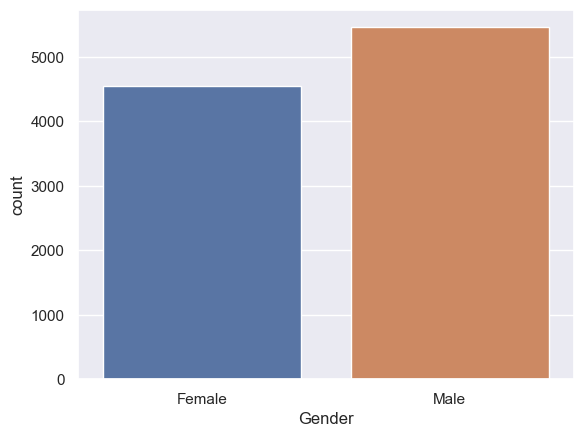

In [139]:
sns.countplot(data=df, x="Gender")

- Conducting a detailed check of the geography column

In [140]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [141]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

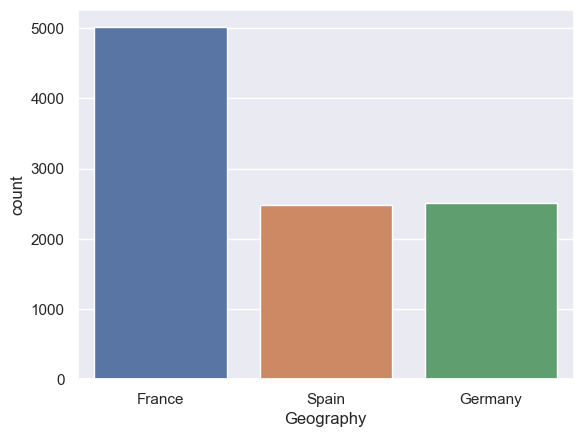

In [142]:
sns.countplot(data=df, x="Geography")

- Conducting a detailed check of the exited column

In [143]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [144]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

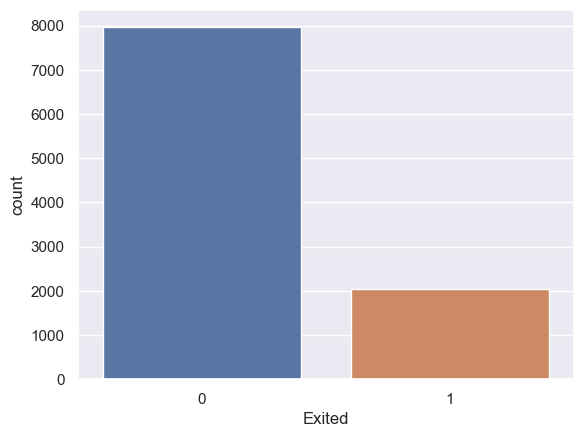

In [145]:
sns.countplot(data=df, x="Exited")

- Examining outliers using a box plot

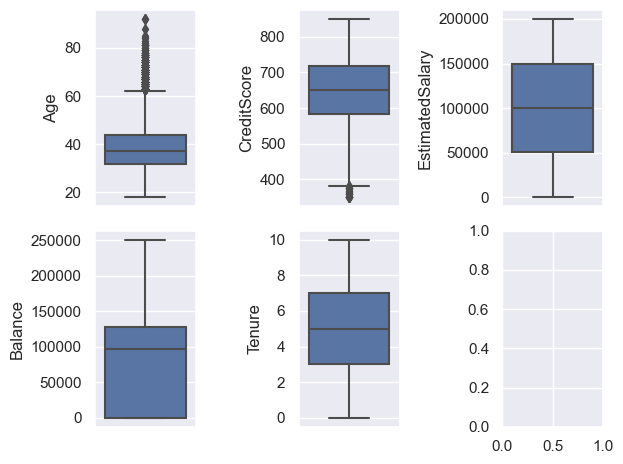

In [146]:
sns.set()
fig, axes = plt.subplots(2, 3)
sns.boxplot(data=df, y="Age", ax=axes[0, 0])
sns.boxplot(data=df, y="CreditScore", ax=axes[0, 1])
sns.boxplot(data=df, y="EstimatedSalary", ax=axes[0, 2])
sns.boxplot(data=df, y="Balance", ax=axes[1, 0])
sns.boxplot(data=df, y="Tenure", ax=axes[1, 1])
plt.tight_layout()
plt.show()

- Box plots of numeric variables grouped by exit status

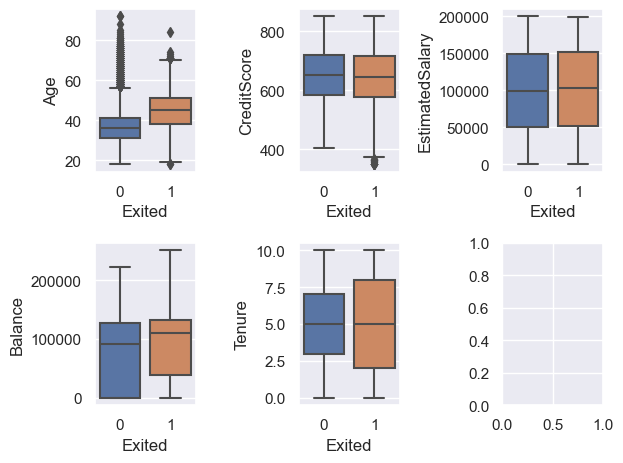

In [147]:
sns.set()
fig, axes = plt.subplots(2, 3)
sns.boxplot(data=df, x="Exited", y="Age", ax=axes[0, 0])
sns.boxplot(data=df, x="Exited", y="CreditScore", ax=axes[0, 1])
sns.boxplot(data=df, x="Exited", y="EstimatedSalary", ax=axes[0, 2])
sns.boxplot(data=df, x="Exited", y="Balance", ax=axes[1, 0])
sns.boxplot(data=df, x="Exited", y="Tenure", ax=axes[1, 1])
plt.tight_layout()
plt.show()

- Distribution of exited cases across geographical locations

In [148]:
df.groupby(["Exited", "Geography"])["Geography"].count()

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
Name: Geography, dtype: int64

[Text(0.5, 1.0, 'Distribution of Credit Score')]

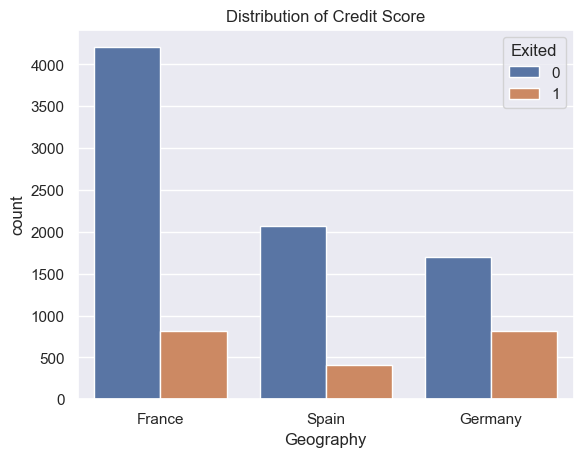

In [149]:
sns.countplot(data=df, x="Geography", hue="Exited").set(
    title="Distribution of Credit Score")

- Distribution of exited cases across gender

In [150]:
df.groupby(["Exited", "Gender"])["Gender"].count()

Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
Name: Gender, dtype: int64

[Text(0.5, 1.0, 'Distribution of Credit Score')]

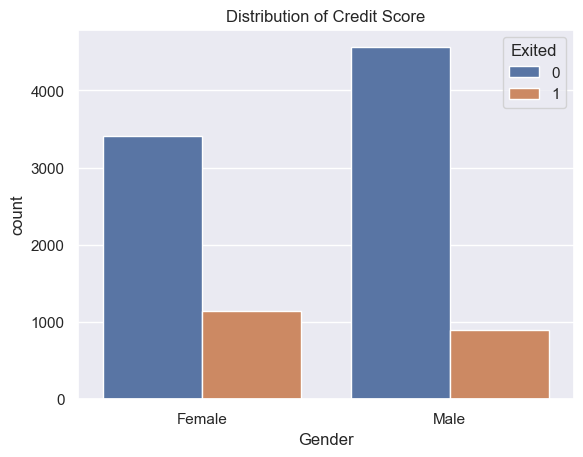

In [151]:
sns.countplot(data=df, x="Gender", hue="Exited").set(
    title="Distribution of Credit Score")

- Average Age Comparison for Exited and Non-Exited Cases

In [152]:
df.groupby("Exited")["Age"].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

- Distribution plots for Credit Score, Age, Balance, and Estimated Salary

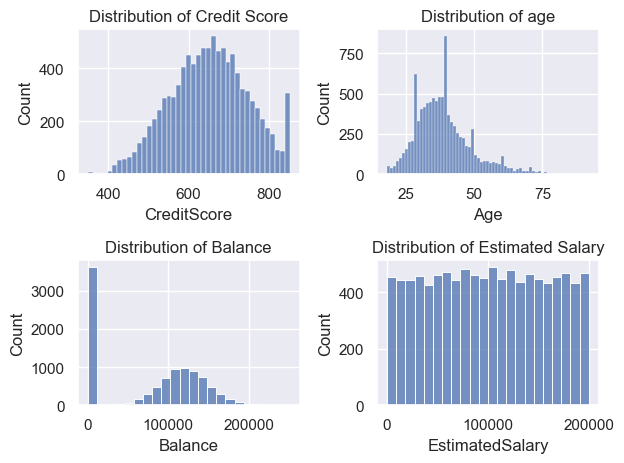

In [153]:
sns.set()
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df, x="CreditScore", ax=axes[0, 0]).set(
    title="Distribution of Credit Score")
sns.histplot(data=df, x="Age", ax=axes[0, 1]).set(title="Distribution of age")
sns.histplot(data=df, x="Balance", ax=axes[1, 0]).set(
    title="Distribution of Balance")
sns.histplot(data=df, x="EstimatedSalary", ax=axes[1, 1]).set(
    title="Distribution of Estimated Salary")
plt.tight_layout()
plt.show()

- Distribution of Credit Score, Age, Balance, and Estimated Salary by exit status

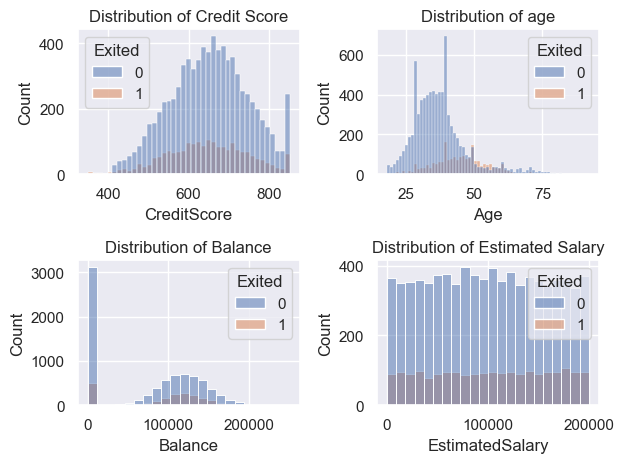

In [154]:
sns.set()
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df, x="CreditScore", ax=axes[0, 0], hue="Exited").set(
    title="Distribution of Credit Score")
sns.histplot(data=df, x="Age", ax=axes[0, 1], hue="Exited").set(
    title="Distribution of age")
sns.histplot(data=df, x="Balance", ax=axes[1, 0], hue="Exited").set(
    title="Distribution of Balance")
sns.histplot(data=df, x="EstimatedSalary", ax=axes[1, 1], hue="Exited").set(
    title="Distribution of Estimated Salary")
plt.tight_layout()
plt.show()

### Data preparation

In [155]:
# Creating Dummy Variables for Gender
df = pd.get_dummies(df, columns=["Gender","Geography"], drop_first=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [156]:
# Drop columns 
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

<Axes: >

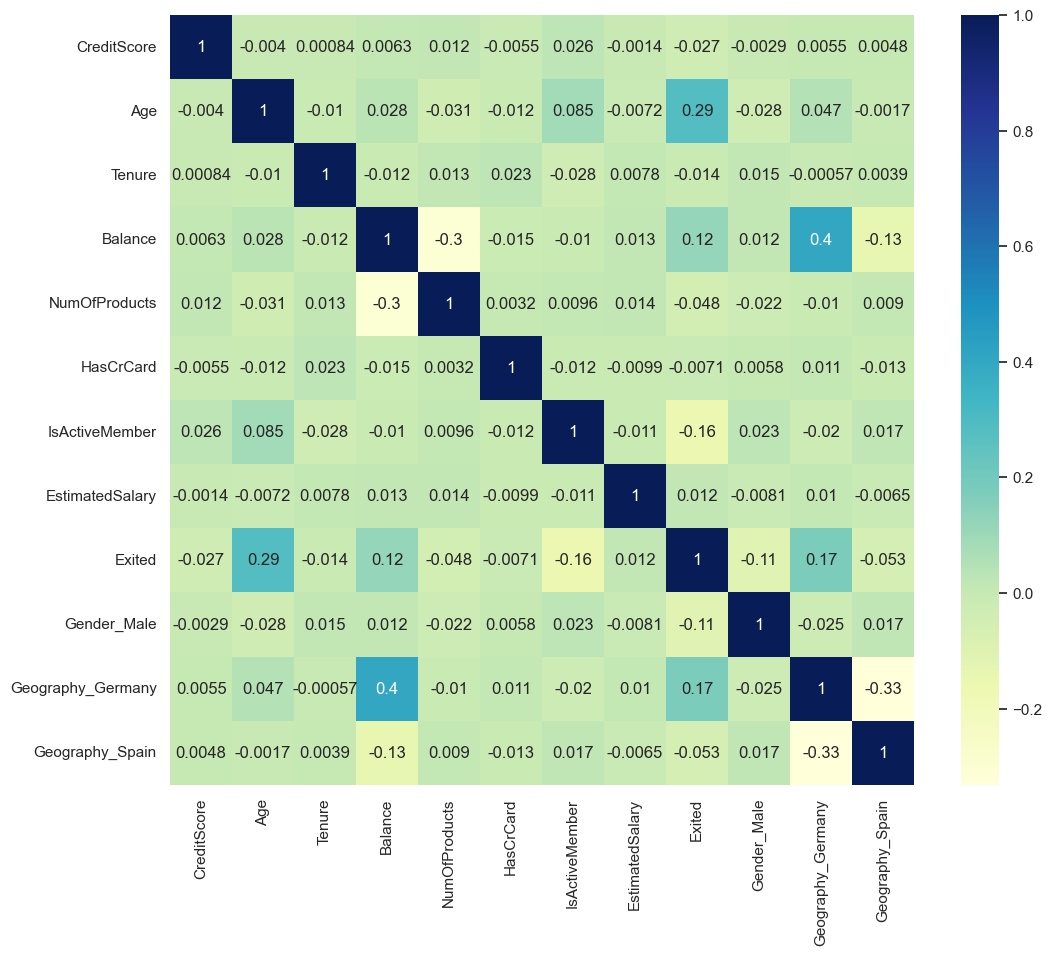

In [157]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_values = df.corr()
sns.heatmap(corr_values, annot=True, cmap="YlGnBu")

In [158]:
# Remove the Outliers
num_columns = df[['CreditScore', 'Age', 'Tenure',
                  'Balance', 'NumOfProducts', 'EstimatedSalary']]

q1 = num_columns.quantile(.25)
q3 = num_columns.quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

lower_point = (num_columns < lower)
upper_point = (num_columns > upper)

outliers = lower_point | upper_point

outliers2 = np.where(outliers)

df = df.drop(index=outliers2[0])

df.shape

(9568, 12)

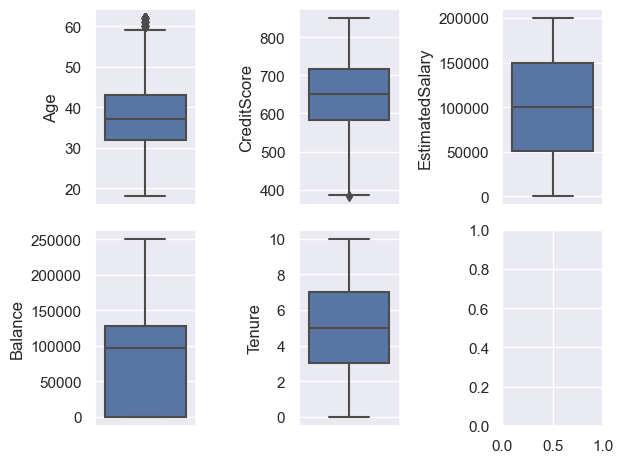

In [159]:
# Outlier plot
sns.set()
fig, axes = plt.subplots(2, 3)
sns.boxplot(data=df, y="Age", ax=axes[0, 0])
sns.boxplot(data=df, y="CreditScore", ax=axes[0, 1])
sns.boxplot(data=df, y="EstimatedSalary", ax=axes[0, 2])
sns.boxplot(data=df, y="Balance", ax=axes[1, 0])
sns.boxplot(data=df, y="Tenure", ax=axes[1, 1])
plt.tight_layout()
plt.show()

### Train-test split

In [160]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Gender_Male',
            'Geography_Germany', 'Geography_Spain']

X_train, X_test, y_train, y_test = train_test_split(
    df[features], df['Exited'], test_size=0.2, random_state=0)

In [161]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

- Logistic Regression

In [162]:
model = LogisticRegression(random_state=0)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions 
y_pred = model.predict(X_test_scaled)

# Measure accuracy
accuracy_logis = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_logis:.4f}')

# Measure weighted precision
precision_logis = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision_logis:.4f}')

# Measure  weighted recall
recall_logis = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall_logis:.4f}')

Accuracy: 0.8495
Precision: 0.8310
Recall: 0.8495


In [163]:
print("Accracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accracy score: 0.8495297805642633
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1571
           1       0.67      0.31      0.43       343

    accuracy                           0.85      1914
   macro avg       0.77      0.64      0.67      1914
weighted avg       0.83      0.85      0.83      1914



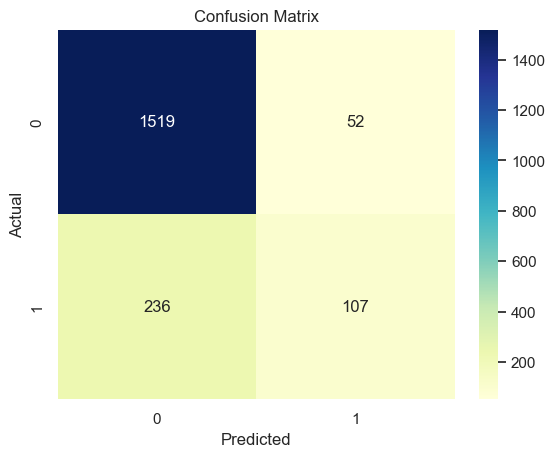

In [164]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

- KNN 

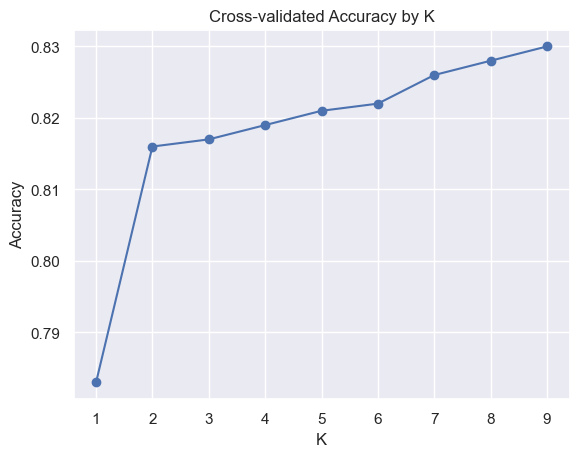

In [165]:
# Find optimal K for K-Nearest neighbors through cross-validated accuracy
list_cv = []
for k in range(1, 10):
    cv_results = cross_validate(KNeighborsClassifier(
        n_neighbors=k), X_train_scaled, y_train, cv=5, scoring='accuracy')  # Performs 5-fold cross-validation using the KNN classifier
    list_cv.append(cv_results['test_score'].mean().round(3))

plt.plot(np.arange(1, 10), list_cv, marker='o')
plt.title('Cross-validated Accuracy by K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Based on the graph, the optimal or best k value appears to be 9 for achieving the highest cross-validated accuracy.

In [166]:
best_k = 9 

model = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions 
y_pred = model.predict(X_test_scaled)

# Measure accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {knn_accuracy:.4f}')

# Measure weighted precision
knn_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {knn_precision:.4f}')

# Measure weighted recall
knn_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {knn_recall:.4f}')

Accuracy: 0.8490
Precision: 0.8304
Recall: 0.8490


In [167]:
print("Accracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accracy score: 0.8490073145245559
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1571
           1       0.65      0.35      0.45       343

    accuracy                           0.85      1914
   macro avg       0.76      0.65      0.68      1914
weighted avg       0.83      0.85      0.83      1914



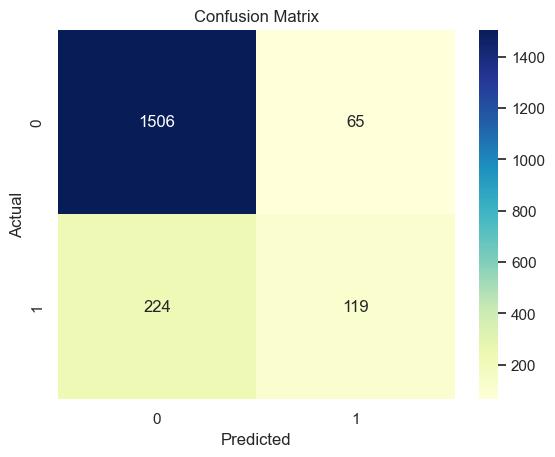

In [168]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

- Random forest

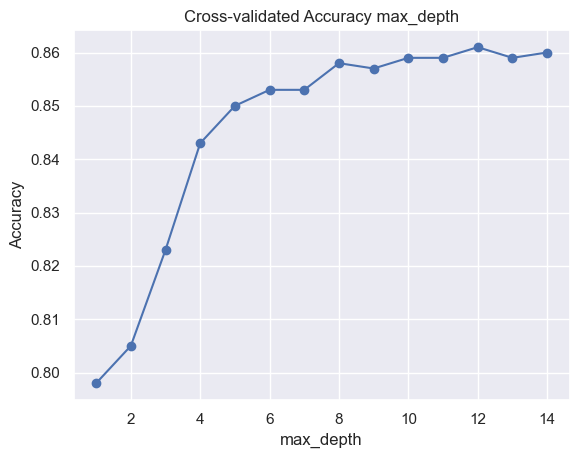

In [178]:
# Find optimal max depth for Random forest through cross-validated accuracy
list_cv = []
for k in range(1, 15):
    cv_results = cross_validate(RandomForestClassifier(
        max_depth=k, min_samples_leaf=4, min_samples_split=8), X_train_scaled, y_train, cv=5, scoring='accuracy')
    list_cv.append(cv_results['test_score'].mean().round(3))

plt.plot(np.arange(1, 15), list_cv, marker='o')
plt.title('Cross-validated Accuracy max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [180]:
max_depth = 12  # select best k

model = RandomForestClassifier(
    max_depth=max_depth, min_samples_leaf=1, min_samples_split=2)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Measure accuracy
rdf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rdf_accuracy:.4f}')

# Measure weighted precision
rdf_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {rdf_precision:.4f}')

# Measure weighted recall
rdf_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {rdf_recall:.4f}')

Accuracy: 0.8798
Precision: 0.8716
Recall: 0.8798


In [181]:
print("Accracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accracy score: 0.8798328108672936
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1571
           1       0.78      0.46      0.58       343

    accuracy                           0.88      1914
   macro avg       0.84      0.71      0.75      1914
weighted avg       0.87      0.88      0.87      1914



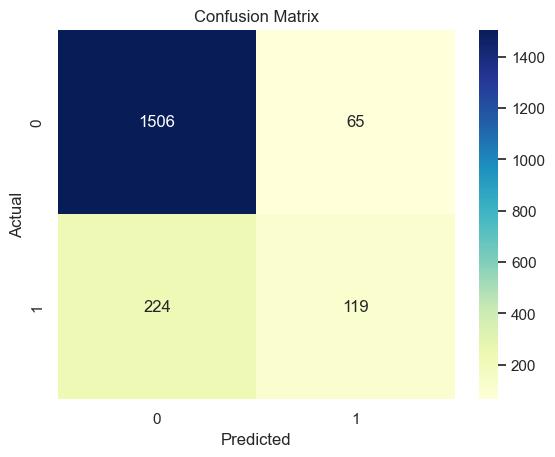

In [182]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

Summary of Model Performance

In [183]:
result_summary = pd.DataFrame({
    'Model': ['Logistic_Regression', 'KNN', 'Random_Forest'],
    'Accuracy': [accuracy_logis, knn_accuracy, rdf_accuracy],
    'Precision': [precision_logis, knn_precision, rdf_precision],
    'Recall': [recall_logis, knn_recall, rdf_recall]
})

In [184]:
result_summary.sort_index(ascending=False)

,Model,Accuracy,Precision,Recall
2,Random_Forest,0.879833,0.871648,0.879833
1,KNN,0.849007,0.830417,0.849007
0,Logistic_Regression,0.849530,0.831017,0.849530


- Model Accuracy Comparison

<Axes: xlabel='Model', ylabel='Accuracy'>

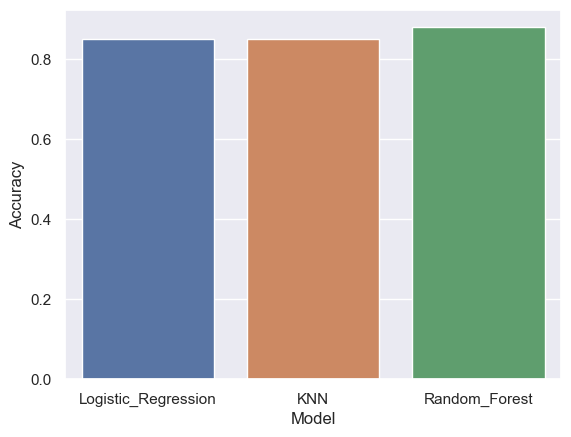

In [185]:
sns.barplot(data=result_summary, x="Model",y="Accuracy")

<Axes: xlabel='Model', ylabel='Precision'>

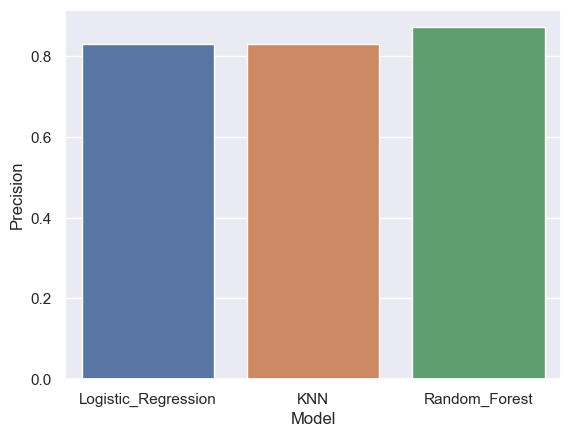

In [186]:
sns.barplot(data=result_summary, x="Model", y="Precision")

<Axes: xlabel='Model', ylabel='Recall'>

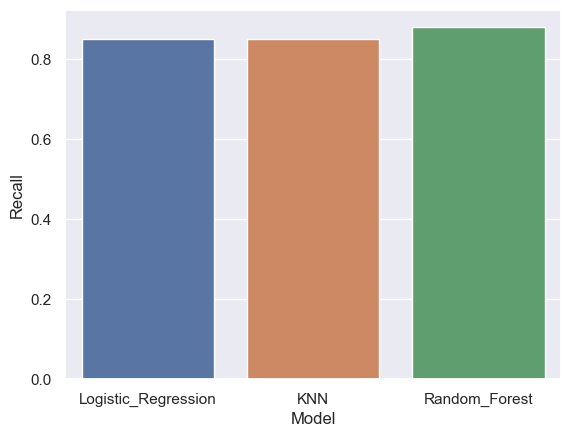

In [187]:
sns.barplot(data=result_summary, x="Model", y="Recall")